# Exploring the Impact of Extracurricular Activities on Secondary School Student Performance in Portugal

- **Authors**: Nariman Avakoli, Marcela Flaherty, Yi Tang, Brianna Zhou
- **Group**: 13

## **1. Introduction**

Portugal's education system is characterized by low levels of education, high failure rates, and a significant early school dropout rate (Caetano, 2012).  A strategic allocation of resources towards extracurricular activities could help improve academic performance among secondary students. Given the impact of education levels on GDP, growth, and child nutrition (Mukesh, Acharya & Pillai, 2023), it is crucial for Portugal to prioritize improving its educational system's performance.


This project aims to investige the relationship between participation in extracurricular activities and academic performance among secondary school students in Portugal. The focus will be on students enrolled in core Mathematics or Portuguese language courses. By conducting two separate hypothesis tests, we will examine whether there is a significant difference in the final grades between students who participate in extracurricular activities and those who do not.

- Our population of interest: all secondary school students in Portugal who are enrolled in the Mathematics or Portuguese language core courses. 

- The point estimate: the mean difference in final grades between students who participate in extracurricular activities and those who do not.



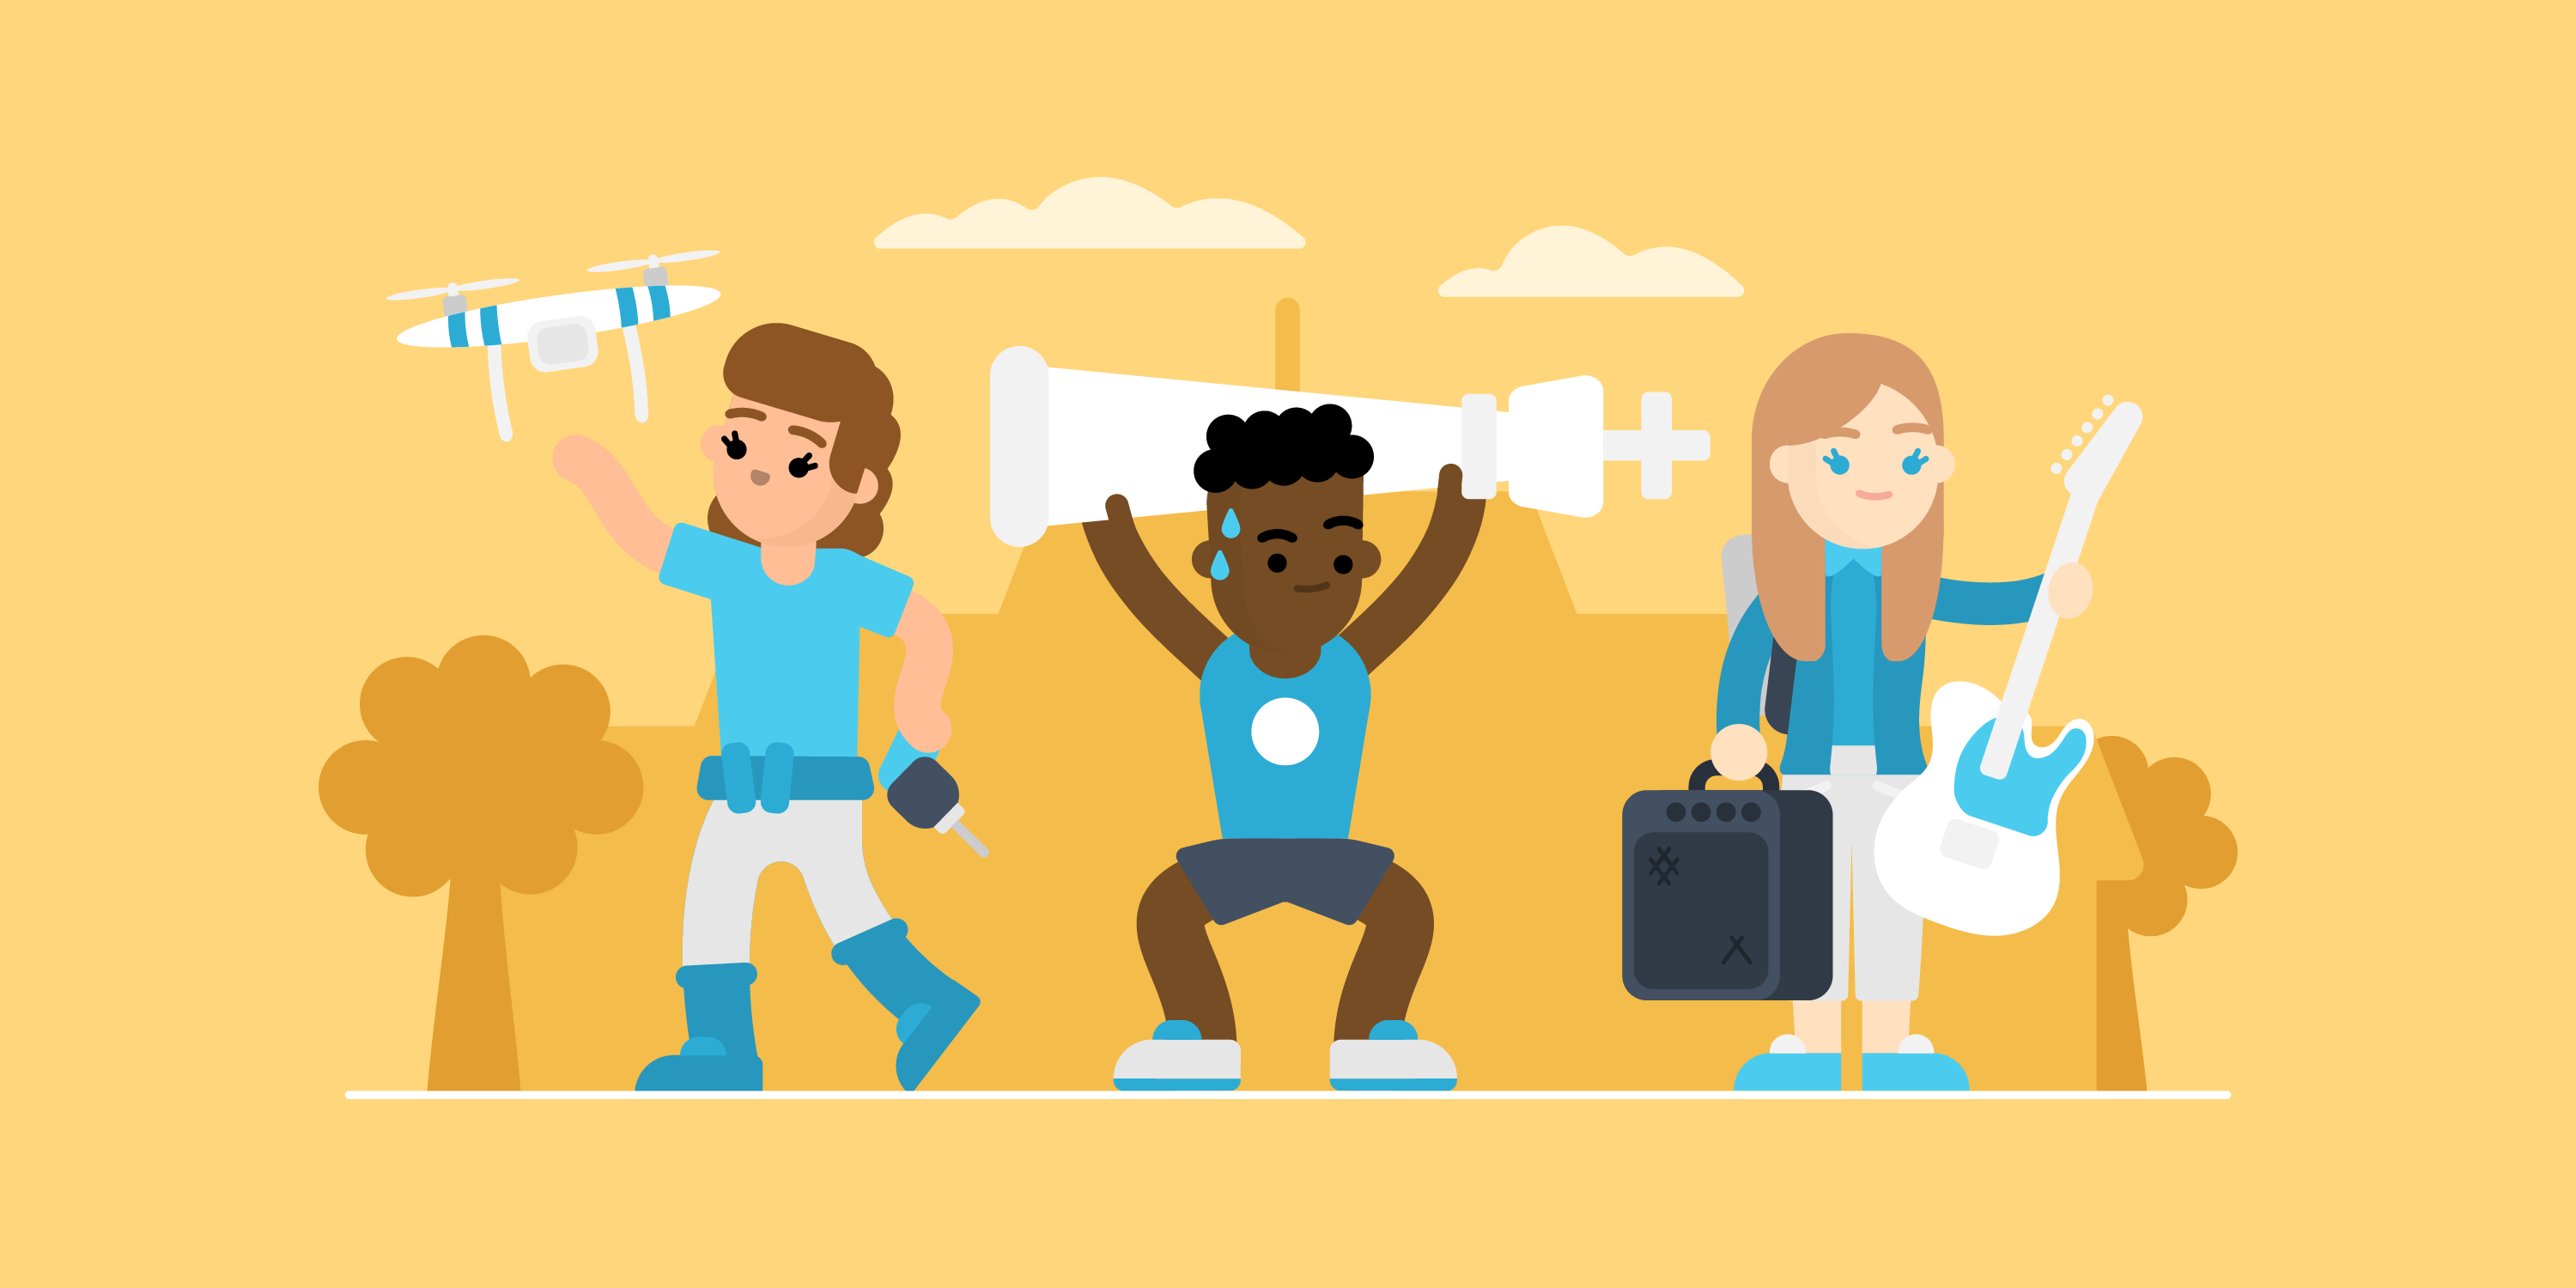

The data for this study, [Student Performance Data Set](https://archive.ics.uci.edu/dataset/320/student+performance), was sourced from the University of California, Irvine machine learning repository. The dataset comprises 33 attributes and 395 observations for students in the Mathematics course and 649 observations for students in the Portuguese course, including data on participation in extracurricular activities.

Of the variables, below are the two of interest:

- `activities`: extra-curricular activities (binary: yes or no)

- `G3`: final grade (numeric: from 0 to 20, output target)

#### **Is there a significant difference in the final grades between Portuguese secondary students enrolled in mathematics or Portuguese who participate in extracurricular activities and those who do not?**





- $H_0$: Mean final grades of students who participate in extracurricular activities and those who do not, are **equal**.

- $H_A$: Mean final grades of students who participate in extracurricular activities are **greater** than those who do not.


## **2. Preliminary Results**

### 2.1.1 Loading relevant libraries

In [51]:
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

### 2.1.2 Reading & Wrangling the datasets from the web into R

- Since we were dealing with 2 data sets, it is decided to read both the data sets separatelly: `mat_data` and `por_data`.

In [52]:
# Reading Math course data and convert it to a dataframe.
mat_data <- read_delim("https://raw.githubusercontent.com/Nariman-av/STAT-201-Group-13/main/student-mat.csv", delim = ";") %>% 
    as.data.frame()
head(mat_data, 4)
colnames(mat_data)
mat_data %>% nrow() 

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15


[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

[1] 395

Data Frame 1

In [53]:
# Reading Portuguese course data and convert it to a dataframe.
por_data <- read_delim("https://raw.githubusercontent.com/Nariman-av/STAT-201-Group-13/main/student-por.csv", delim = ";") %>% 
    as.data.frame()
head(por_data, 4)
colnames(por_data)
por_data %>% nrow()

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14


[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

[1] 649

Data Frame 2

In [54]:
# Select the two attribes, final grade and extracurricular activity participation.
mat_data <- mat_data %>%
    select(activities, G3)


head(mat_data)

,activities,G3
,<chr>,<dbl>
1,no,6
2,no,6
3,no,10
4,yes,15
5,no,10
6,yes,15


Data Frame 3

In [55]:
# Select the two attribes, final grade and extracurricular activity participation.
por_data <- por_data %>%
    select(activities, G3)


head(por_data)

,activities,G3
,<chr>,<dbl>
1,no,11
2,no,11
3,no,12
4,yes,14
5,no,13
6,yes,13


Data Frame 4

### 2.1.3 Exploratory Data Analysis

- We begin with the summary tables for `mat_data` and `por_data`.

In [56]:
# Summary table for mathematics course.
summary(mat_data)

# Summary table for Portuguese course.
summary(por_data)

  activities              G3       
 Length:395         Min.   : 0.00  
 Class :character   1st Qu.: 8.00  
 Mode  :character   Median :11.00  
                    Mean   :10.42  
                    3rd Qu.:14.00  
                    Max.   :20.00  

  activities              G3       
 Length:649         Min.   : 0.00  
 Class :character   1st Qu.:10.00  
 Mode  :character   Median :12.00  
                    Mean   :11.91  
                    3rd Qu.:14.00  
                    Max.   :19.00  

In [57]:
# Point estimates of mean, median, and standard deviation for math course
mat_data_summary <- mat_data %>% 
    group_by(activities) %>% 
    summarize(Mean_mat_grade = mean(G3),
              Median_mat_grade = median(G3),
              SD_mat_grade = sd(G3),
              Num_mat_students = n())

mat_data_summary

activities,Mean_mat_grade,Median_mat_grade,SD_mat_grade,Num_mat_students
<chr>,<dbl>,<dbl>,<dbl>,<int>
no,10.34021,11,4.488065,194
yes,10.48756,11,4.679861,201


Table 1

In [58]:
# Point estimates of mean, median, and standard deviation for portuguese course
por_data_summary <- por_data %>% 
    group_by(activities) %>% 
    summarize(Mean_por_grade = mean(G3),
              Median_por_grade = median(G3),
              SD_por_grade = sd(G3),
              Num_por_students = n())

por_data_summary

activities,Mean_por_grade,Median_por_grade,SD_por_grade,Num_por_students
<chr>,<dbl>,<dbl>,<dbl>,<int>
no,11.71856,11,3.235290,334
yes,12.10476,12,3.218944,315


Table 2

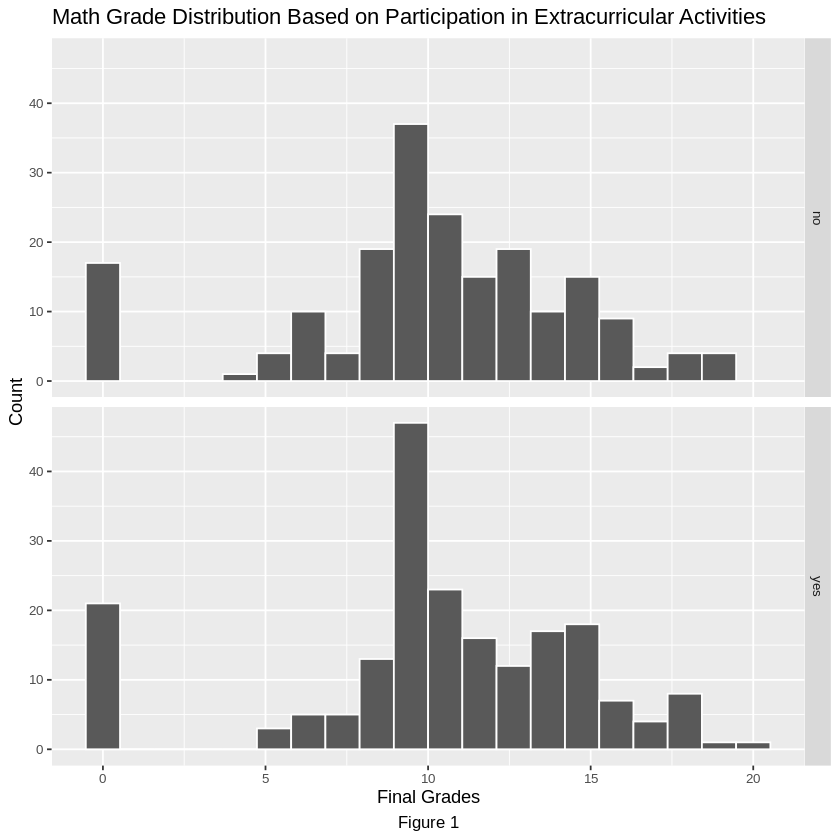

In [59]:
# Create a distribution of mathematics grades.
mat_data %>%
    ggplot(aes(x = G3)) +
    geom_histogram(bins = 20, color = "white") +
    facet_grid(activities ~ .) +
    labs(title = "Math Grade Distribution Based on Participation in Extracurricular Activities", x="Final Grades", y="Count", caption = "Figure 1") +
    theme(text = element_text(size = 10),
          title = element_text(size = 11), plot.caption = element_text(size = 10, hjust = 0.5))

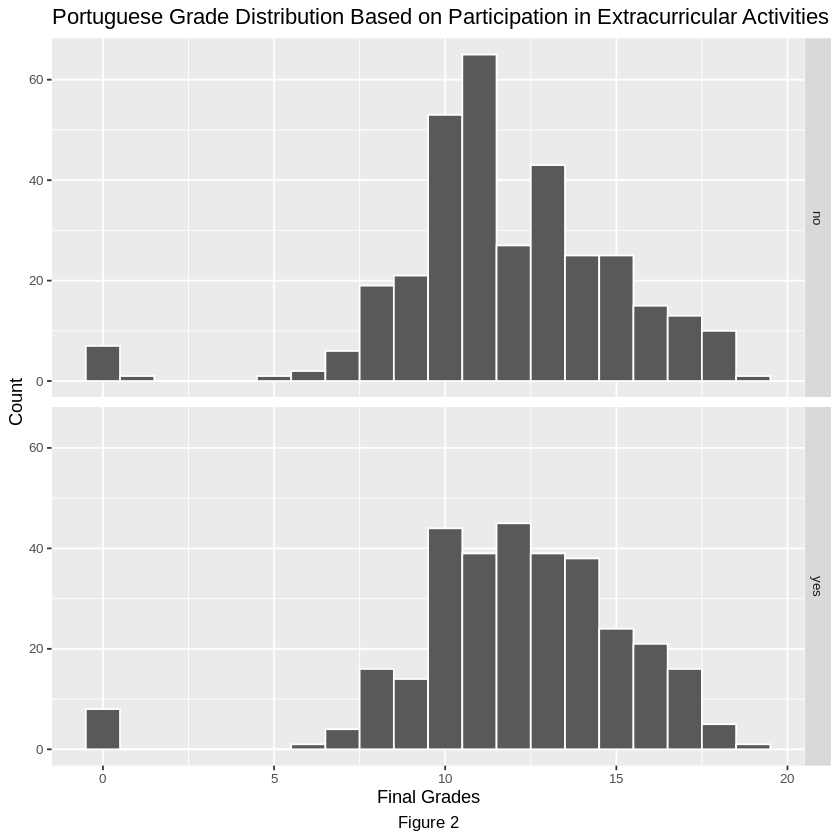

In [60]:
# Create a distribution of Portuguese grades.
por_data %>%
    ggplot(aes(x = G3)) +
    geom_histogram(bins = 20, color = "white") +
    facet_grid(activities ~ .) +
    labs(title = "Portuguese Grade Distribution Based on Participation in Extracurricular Activities", x="Final Grades", y="Count", caption = "Figure 2") +
    theme(text = element_text(size = 10),
          title = element_text(size = 11),plot.caption = element_text(size = 10, hjust = 0.5))

- `Final Grades (G3)` for both courses, ranging from 0 to 20, mainly fall between 7.5 and 16, with notable outliers at 0. The distributions are roughly bell-shaped and symmetric, suggesting normality, with the unimodal peak indicating the data's central tendency.

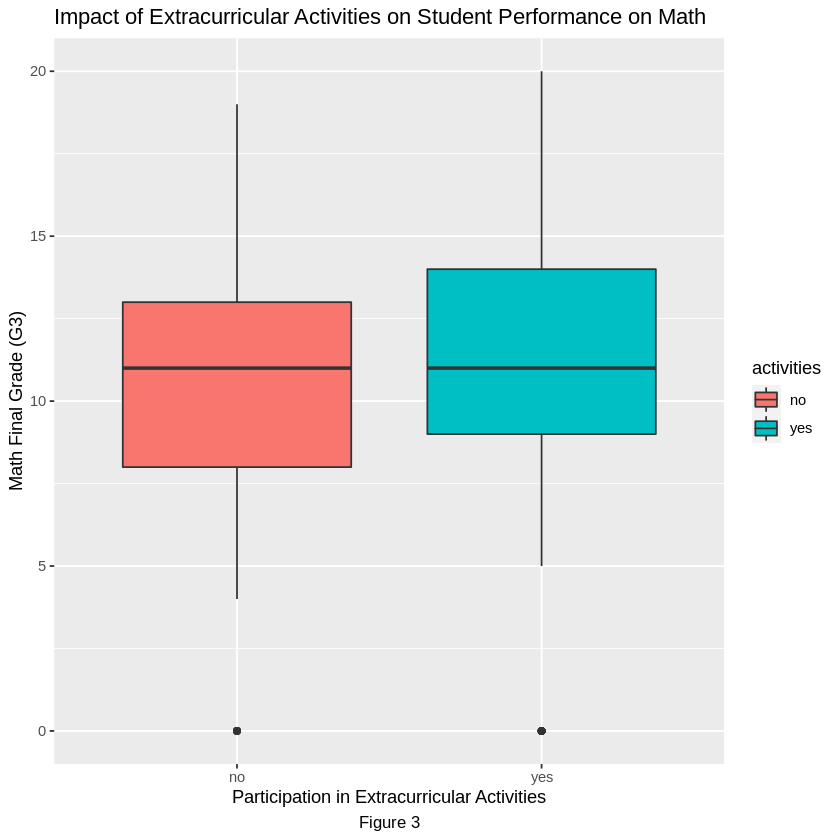

In [61]:
# Create a boxplot of Math grades based on participation in extracurricular activities
mat_box_plot<-
    mat_data %>%
        ggplot(aes(x = activities, y = G3, fill = activities)) +
        geom_boxplot() +
        labs(x = "Participation in Extracurricular Activities", y = "Math Final Grade (G3)", 
        title = "Impact of Extracurricular Activities on Student Performance on Math",caption = "Figure 3") +
        theme(text = element_text(size = 11),plot.caption = element_text(size = 10, hjust = 0.5))
mat_box_plot

In [62]:
mat_diff <-
    mat_data_summary %>% 
    ungroup() %>%
    summarize(Math_mean_yes = Mean_mat_grade[activities == "yes"],
              Math_mean_no = Mean_mat_grade[activities == "no"],
              Math_mean_difference = Mean_mat_grade[activities == "yes"] - Mean_mat_grade[activities == "no"])

mat_diff

Math_mean_yes,Math_mean_no,Math_mean_difference
<dbl>,<dbl>,<dbl>
10.48756,10.34021,0.147356


Table 3

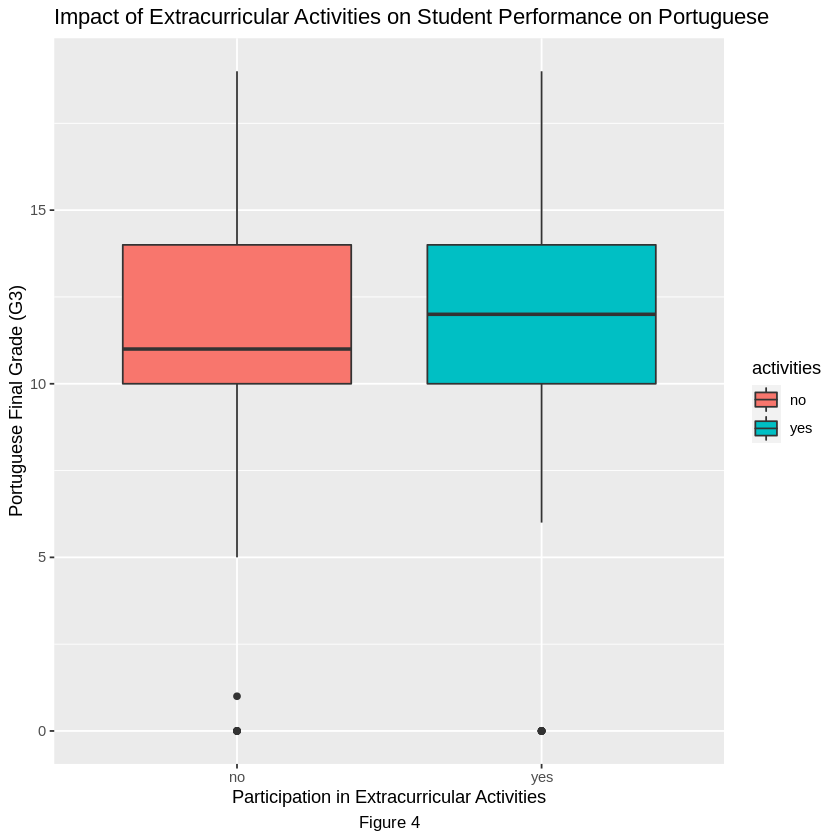

In [63]:
# Create a boxplot of Portuguese grades based on participation in extracurricular activities
por_box_plot <-
    por_data %>%
        ggplot(aes(x = activities, y = G3, fill = activities)) +
        geom_boxplot() +
        labs(x = "Participation in Extracurricular Activities", y = "Portuguese Final Grade (G3)", 
        title = "Impact of Extracurricular Activities on Student Performance on Portuguese",caption = "Figure 4") +
        theme(text = element_text(size = 11),plot.caption = element_text(size = 10, hjust = 0.5))
por_box_plot

In [64]:
por_diff <-
    por_data_summary %>% 
    ungroup() %>%
    summarize(Por_mean_yes = Mean_por_grade[activities == "yes"],
              Por_mean_no = Mean_por_grade[activities == "no"],
              Por_mean_difference = Mean_por_grade[activities == "yes"] - Mean_por_grade[activities == "no"])

por_diff

Por_mean_yes,Por_mean_no,Por_mean_difference
<dbl>,<dbl>,<dbl>
12.10476,11.71856,0.386199


Table 4

- In both Mathematics and Portuguese courses, students participating in extracurricular activities have slightly higher mean final grades than those not participating, with mean differences of 0.15 and 0.39 respectively. The boxplots (Figures 3 and 4) show that the grade ranges for students in activities are higher in Mathematics and slightly narrower in Portuguese compared to those not participating, with outliers at 0 in both courses.

### 2.2 Methods: Plan

### 2.2.1 Hypothesis testing in Mean differences of Math Final Grades

- In this section, we will work with two samples: secondary school students in Portugal enrolled in Mathematics who either participate or don't participate in extracurricular activities.

- $\mu_{\text{activity_yes}}$ is the mean Math final grade for student who participate in extracurricular activities `activities == "yes"` ; $\mu_{\text{activity_no}}$ is the mean Math final grade for student who do not participate in extracurricular activities `activities == "no"`.

$$H_0: \mu_{\text{activity_yes}} - \mu_{\text{activity_no}} = 0$$ $$H_1: \mu_{\text{activity_yes}} - \mu_{\text{activity_no}} > 0$$

The observed test statistic as the difference in the mean Math final grades between `activities == "yes"` &  `activities == "no"` is:

In [65]:
obs_mean_mat_diff <- 
    mat_diff %>%
    pull(Math_mean_difference)

obs_mean_mat_diff

[1] 0.147356

Generate 5000 samples from the bootstrap distribution。

In [66]:
set.seed(50)

bootstrap_distribution_mat <- 
   mat_data %>% 
   specify(formula = G3 ~ activities) %>% 
   generate(reps = 5000, type = "bootstrap") %>% 
   calculate(stat="diff in means", order = c("yes", "no"))

head(bootstrap_distribution_mat)

replicate,stat
<int>,<dbl>
1,0.77627302
2,0.67416076
3,0.26440261
4,0.49819429
5,0.02700689
6,0.33017268


Visualize the results using a histogram and overlay the observed statistic (difference in means from the original `mat_data`) to see where it lies in the distribution.

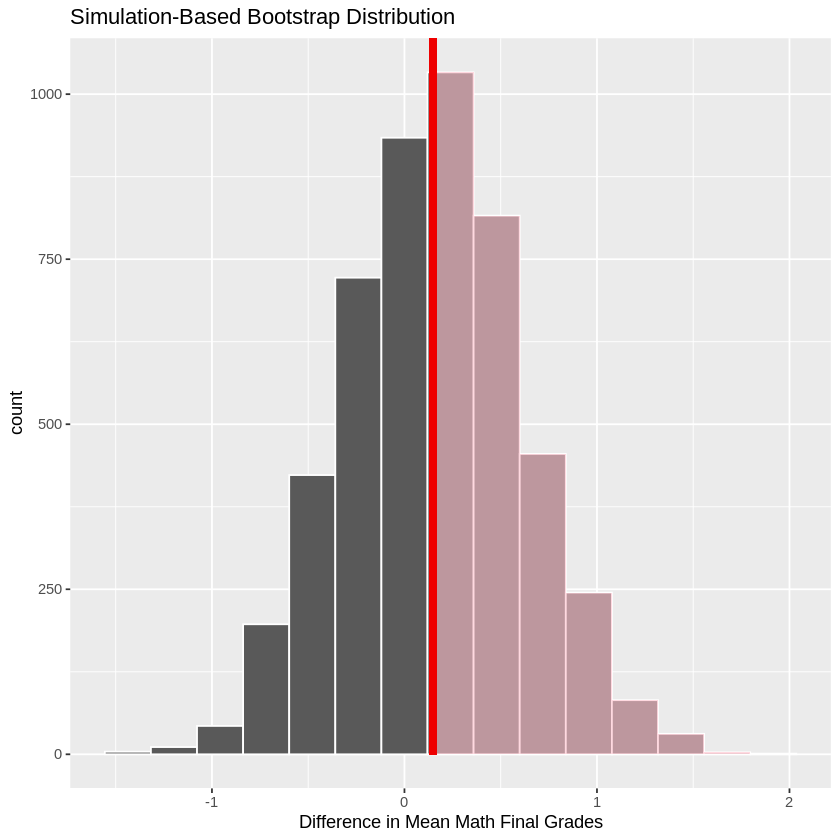

In [67]:
mat_result_plot <- 
   bootstrap_distribution_mat %>%
   visualize() + 
   shade_p_value(obs_stat = obs_mean_mat_diff, direction = "right") +
   xlab("Difference in Mean Math Final Grades")

mat_result_plot

Obtain the p-value from `bootstrap_distribution_mat`.

In [68]:
bootstrap_distribution_mat %>% 
  get_p_value(obs_stat = obs_mean_mat_diff, direction = "right")

p_value
<dbl>
0.51


Since 5% significance level, `p_value` > the significance level. We fail to reject $H_0$.

### 2.2.2 Estimating Mean differences of Math Final Grades Using Bootstrap Sampling Distribution

Compute the 95% confidence intervals:

In [69]:
percentile_ci_mat <- bootstrap_distribution_mat %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

percentile_ci_mat

lower_ci,upper_ci
<dbl>,<dbl>
-0.7265731,1.069669


We are 95% “confident” that the true difference in mean Math final grades $m1 - m2$ is between (-0.726, 1.069). 

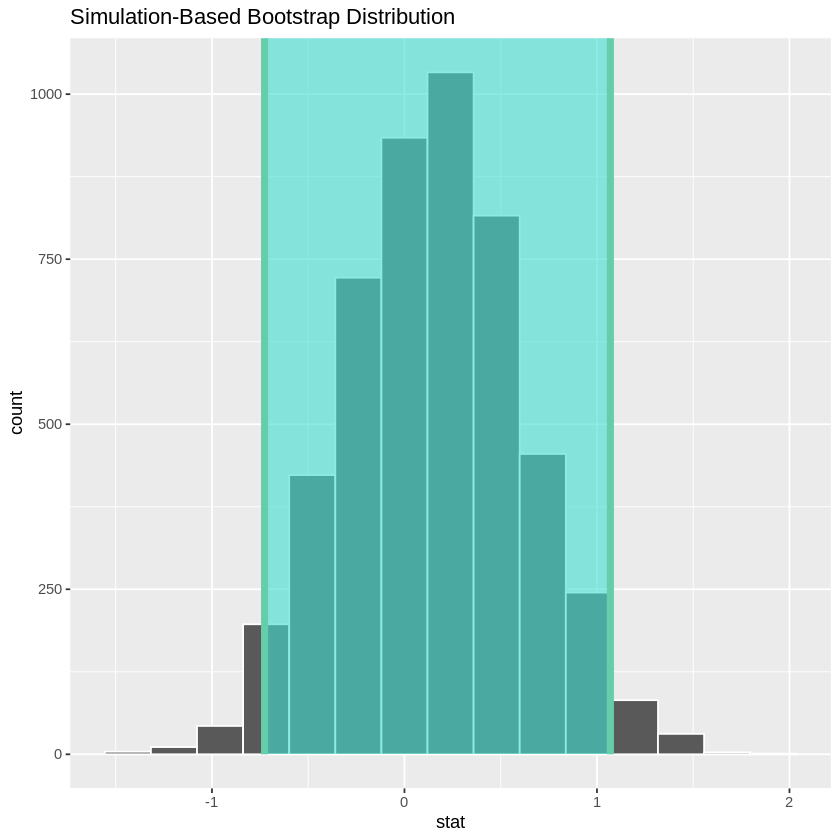

In [70]:
visualize(bootstrap_distribution_mat) + 
  shade_confidence_interval(endpoints = percentile_ci_mat)

Notice that a difference of 0 is included in our net, suggesting that the mean Math final grade for student who participate in extracurricular activities and who do not can be equal.

### 2.2.3 Hypothesis testing in Mean differences of Portuguese Final Grades

- In this section, we will work with two samples: secondary school students in Portugal who are enrolled in the Portuguese that participate in extracurricular activities; and secondary school students in Portugal who are enrolled in the Portuguese that do not participate in extracurricular activities.

- $\mu_{\text{activity_yes}}$ is the mean Portuguese final grade for student who participate in extracurricular activities `activities == "yes"` ; $\mu_{\text{activity_no}}$ is the mean Portuguese final grade for student who do not participate in extracurricular activities `activities == "no"`.

$$H_0: \mu_{\text{activity_yes}} - \mu_{\text{activity_no}} = 0$$ $$H_1: \mu_{\text{activity_yes}} - \mu_{\text{activity_yes}} > 0$$

Use `two-sample t-test`:

Start by taking a look at the boxplot of Portuguese grades based on participation in extracurricular activities, `yes` and `no`.

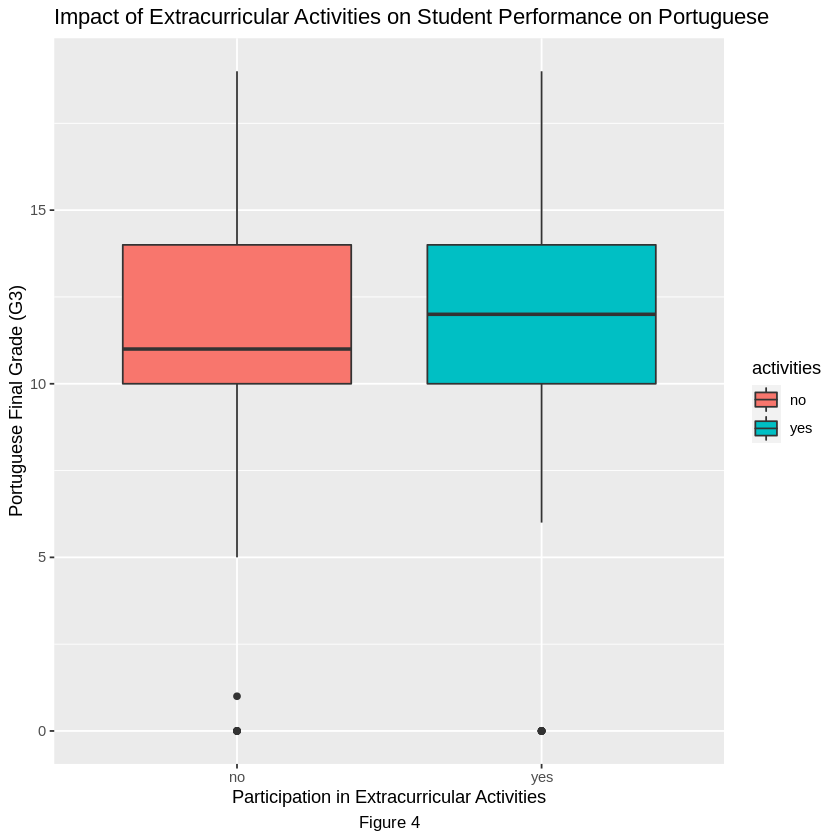

In [71]:
por_box_plot

The boxplot indicates that

In [72]:
por_data_summary

activities,Mean_por_grade,Median_por_grade,SD_por_grade,Num_por_students
<chr>,<dbl>,<dbl>,<dbl>,<int>
no,11.71856,11,3.235290,334
yes,12.10476,12,3.218944,315


Calculate this test statistic:
$$T = \frac{\bar{x}_{\text{activity_yes}} - \bar{x}_{\text{activity_no}}}{\sqrt{\frac{s^2_{\text{activity_yes}}}{n_1}+\frac{s^2_{\text{activity_no}}}{n_2}}}
$$

In [73]:
test_stat <- 
    (por_data_summary$Mean_por_grade[2] - por_data_summary$Mean_por_grade[1]) / 
sqrt(por_data_summary$SD_por_grade[2]^2 / por_data_summary$Num_por_students[2] + (por_data_summary$SD_por_grade[1]^2 / por_data_summary$Num_por_students[1]))

test_stat 

[1] 1.523819

If $H_0$ is true, i.e., if $\mu_{\text{activity_yes}} = \mu_{\text{activity_no}}$, the $T$ statistic from the previous exercise follows a $t$ distribution with approximately
$$
\nu = \frac{
    \left(\frac{s_{activity_yes}^2}{n_1}+\frac{s_{activity_no}^2}{n_2}\right)^2
}
{
\frac{s_{activity_yes}^4}{n_1^2(n_1-1)}+\frac{s_{activity_no}^2}{n_2^2(n_2-1)}
}
$$
degrees of freedom.

In [74]:
# Calculate degree of f
df <- (por_data_summary$SD_por_grade[2]^2 / por_data_summary$Num_por_students[2] + (por_data_summary$SD_por_grade[1]^2 / por_data_summary$Num_por_students[1]))^2 /
(por_data_summary$SD_por_grade[2]^4 / (por_data_summary$Num_por_students[2]^2 *(por_data_summary$Num_por_students[2] - 1))
+ (por_data_summary$SD_por_grade[1]^4 / (por_data_summary$Num_por_students[1]^2 *(por_data_summary$Num_por_students[1] - 1))))

df 

[1] 645.1463

obtain the p-value for this hypothesis test using $\nu \approx 645$.

In [75]:
p_value <- 2 * pt(test_stat, df = 645, lower.tail = FALSE)

p_value

[1] 0.128044

Since `p_value` is > than 5% significance level,

### 2.2.4 Estimating Mean differences of Portuguese Final Grades Using Central Limit Theorem (CLT)

This report is based on a comprehensive dataset from a reputable study, employing statistical methods such as hypothesis testing and paramater estimates for credibility of our findings and the evaluation of our research question. 

Our plots and estimates produced offer valuable analysis, but they may not be comprehensive enough for stakeholders. Therefore, we will impliment a bootstrap distribution, a confidence interval, and signficance testing at a 5% level for a more precise evaluation of the mean difference. Our analysis involves random processes, using fixed seeds and specifies the sampling procedure explicitly to ensure reproducibility of the analysis. 

In this study, we expect to find a significant difference in final grades between students participating in extracurricular activities to those who do not in both the mathematics and Portuguese language courses.The analysis may show a correlation between extracurricular activities and final grades, but establishing causality may be a challenge due to potential confounding variables and interdependencies. 

The findings could have many impacts, such as influence to educational policy and resource allocation in Portugal in order to improve academic performance. Future research questions could arrise, digging deeper to the types of extracurricular activities that most impact academic performance such as sports or music.

## **4. References**


Caetano, L. (2012). Abandono escolar: Repercussões sócio-económicas na região centro. algumas reflexões. Finisterra, 40(79). https://doi.org/10.18055/Finis1503

Mukesh, H. V., Acharya, V., & Pillai, R. (2023). Are extracurricular activities stress busters to enhance students’ well-being and academic performance? evidence from a natural experiment. Journal of Applied Research in Higher Education, 15(1), 152-168. https://doi.org/10.1108/JARHE-06-2021-0240
